[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM-examples.git/main?urlpath=PySDM_examples/Lowe_et_al_2019/fig_2.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM-examples/blob/main/PySDM_examples/Lowe_et_al_2019/fig_2.ipynb)

#### based on Fig. 1 from Lowe et al. 2019 (Nature Comm.)  "_Key drivers of cloud response to surface-active organics_"
https://doi.org/10.1038/s41467-019-12982-0

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install atmos-cloud-sim-uj-utils
    from atmos_cloud_sim_uj_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
from matplotlib import pylab
import numpy as np
from PySDM.physics import si, Formulae, constants as const, spectra
from atmos_cloud_sim_uj_utils import show_plot
from PySDM_examples.Singer.aerosol import AerosolBetaCary

In [3]:
from PySDM.physics.surface_tension import compressed_film_Ovadnevaite
compressed_film_Ovadnevaite.sgm_org = 40 * si.mN / si.m
compressed_film_Ovadnevaite.delta_min = 0.3 * si.nm

from PySDM.physics.surface_tension import compressed_film_Ruehl
aer = AerosolBetaCary()
compressed_film_Ruehl.nu_org = aer.aerosol_modes_per_cc['nu_org']
compressed_film_Ruehl.A0 = 115e-20 * si.m * si.m # 115 A^2/molecule
compressed_film_Ruehl.C0 = 6e-7 #np.exp(-4.0) 
compressed_film_Ruehl.m_sigma = 0.3e-3 * si.J
compressed_film_Ruehl.sgm_min = 40 * si.mN / si.m

# A0=115, ln(C0)=-4, and m=0.3

# MW_inorg = 132;  # ammonium sulfate
# MW_H2O = 0.018015;
# VHF_org = 1;     # vant hoff factor
# VHF_inorg = 2.6;
# pw = 997;
# rho_inorg = 1.77 * 1e3;  # kg m-3 
# MW_inorg = 0.13214;       # kg mol-1
# rho_org = 905;             # kg m-3
# MW_org = 0.20436;         # kg mol-1

In [4]:
cases = {
    'Beta Caryophyllene': AerosolBetaCary(),
    'Beta Caryophyllene': AerosolBetaCary()
}

formulae_bulk = Formulae(surface_tension='Constant')
formulae_ovad = Formulae(surface_tension='CompressedFilm_Ovadnevaite')
formulae_ruehl = Formulae(surface_tension='CompressedFilm_Ruehl')

r_wet = np.logspace(np.log(150 * si.nm), np.log(3000 * si.nm), base=np.e, num=100)
r_dry = 50 * si.nm
v_wet = formulae_ovad.trivia.volume(r_wet)
v_dry = formulae_ovad.trivia.volume(r_dry)
T=300 * si.K
r_wet_ticks_nm = (300, 500, 700, 1000, 3000)

### Fig. 1 a

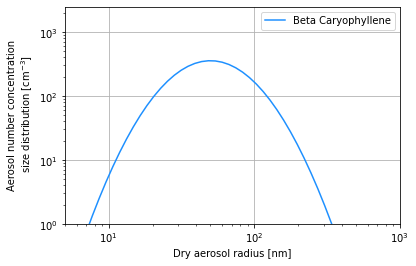

In [5]:
x = np.logspace(np.log(5 * si.nm), np.log(1000 * si.nm), base=np.e)
for k, v in cases.items():
    spec = v.aerosol_modes_per_cc['spectrum']
    pylab.loglog(x / si.nm, spec.size_distribution(x)*x / si.cm**-3, label=k, color=v.color)
pylab.ylim(1, 2500)
pylab.xlim(5, 1000)
pylab.legend()
pylab.grid()
pylab.xlabel('Dry aerosol radius [nm]')
pylab.ylabel('Aerosol number concentration\n size distribution [cm$^{-3}$]')
pylab.show()
#show_plot()

### Fig. 1 c

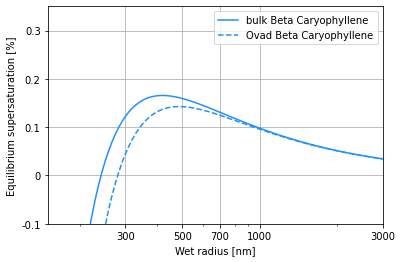

In [6]:
rd3 = r_dry**3
        
for label, formulae in {'bulk': formulae_bulk, 'Ovad': formulae_ovad}.items():#, 'Ruehl': formulae_ruehl}.items():
    for k, v in cases.items():
        sigma = formulae.surface_tension.sigma(np.nan, v_wet, v_dry, v.aerosol_modes_per_cc['f_org'])
        RH_eq = formulae.hygroscopicity.RH_eq(r_wet, T, v.aerosol_modes_per_cc['kappa'][label], rd3, sigma)
        if label == "bulk":
            linestyle='-'
        elif label == "Ovad":
            linestyle='--'
        elif label == "Ruehl":
            linestyle=':'
        else:
            linestyle='-.'
        pylab.plot(
            r_wet / si.nm, 
            (RH_eq - 1)*100, 
            label=f"{label} {k}", 
            color=v.color, 
            linestyle=linestyle
        )
pylab.grid()
pylab.xscale('log')
pylab.xticks(r_wet_ticks_nm, r_wet_ticks_nm)
pylab.xlabel('Wet radius [nm]')
pylab.xlim(r_wet[0] / si.nm, r_wet[-1] / si.nm)
pylab.ylabel('Equilibrium supersaturation [%]')
yticks = (-.1, 0, .1, .2, .3)
pylab.yticks(yticks, yticks)
pylab.ylim(yticks[0], .35)
pylab.legend()
pylab.show()
#show_plot()

### Fig. 1 d

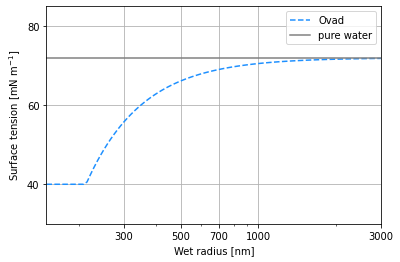

In [12]:
for label, formulae in {'Ovad': formulae_ovad}.items():#, 'Ruehl': formulae_ruehl}.items():
    if label == "bulk":
        linestyle='-'
    elif label == "Ovad":
        linestyle='--'
    elif label == "Ruehl":
        linestyle=':'
    else:
        linestyle='-.'
    for k, v in cases.items():
        sigma = formulae.surface_tension.sigma(np.nan, v_wet, v_dry, v.aerosol_modes_per_cc['f_org'])
        pylab.plot(r_wet / si.nm, sigma / (si.mN / si.m), label=label, color=v.color, linestyle=linestyle)

pylab.plot(r_wet / si.nm, np.full_like(r_wet, const.sgm_w / (si.mN / si.m)), label='pure water', color='gray')
pylab.grid()
pylab.xscale('log')
pylab.xticks(r_wet_ticks_nm, r_wet_ticks_nm)
yticks = (20, 40, 60, 80)
pylab.yticks(yticks, yticks)
pylab.xlim(r_wet[0] / si.nm, r_wet[-1] / si.nm)
pylab.ylim(30, 85)
pylab.xlabel('Wet radius [nm]')
pylab.ylabel('Surface tension [mN m$^{-1}$]')
pylab.legend()
pylab.savefig("fig1d.png")
pylab.show()
#show_plot()